# Prediction Boston House Prices Using Regression
## Employing *Data Analytics* on the BostonHousingData to first gain insights and then applying *Machine Learning algorithms* like Regression to create a Predictive Model

The order of work is followed as:
* Importing Required Packages and Modules
* Importing Dataset
* Data Preprocessing
* Exploratory Data Analysis
* Visual Exploratory Data Analysis
* Data Cleaning for Outliners
* Feature Selection Through Visual and Statistical Exploration
* Data Preprocessing and Normalization for ML
* Linear Regression Model
* Ridge Regression Model
* Lasso Regression Model

## Importing Required Packages and Modules

In [83]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [23]:
bos = load_boston()
df = pd.DataFrame(data = bos['data'], columns = bos['feature_names'])
df['MEDV'] = bos['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### The features can be summarized as follows:
<ol>
<li> CRIM : This is the per capita crime rate by town </li>
<li> ZN : This is the proportion of residential land zoned for lots larger than 25,000 sq.ft. </li>
<li> INDUS : This is the proportion of non-retail business acres per town. </li>
<li> CHAS : This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)</li>
<li> NOX : This is the nitric oxides concentration (parts per 10 million)</li>
<li> RM : This is the average number of rooms per dwelling</li>
<li> AGE : This is the proportion of owner-occupied units built prior to 1940</li>
<li> DIS : This is the weighted distances to five Boston employment centers</li>
<li> RAD : This is the index of accessibility to radial highways</li>
<li> TAX : This is the full-value property-tax rate per \$ 10,000</li>
<li> PTRATIO : This is the pupil-teacher ratio by town</li>
<li> B : This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town</li>
<li> LSTAT : This is the percentage lower status of the population</li>
<li> MEDV : This is the median value of owner-occupied homes in \$ 1000</li>
</ol>

## Data Preprocessing

In [21]:
df.shape  #confirming size of our dataset

(506, 14)

In [22]:
df.isnull().sum()    #checking for null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [30]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [42]:
correlation = df.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### The selected columns in this step are not final, further study will be done and then a final list will be created

* **CRIM** - Continuous. Selected.
* **ZN** - Continuous. Selected.
* **INDUS** - Continuous. Selected.
* **CHAS** - Categorical. Selected.
* **NOX** - Continuous. Selected.
* **RM** - Continuous. Selected.
* **AGE** - Continuous. Selected.
* **DIS** - Continuous. Selected.
* **RAD** - Categorical. Selected.
* **TAX** - Continuous. Selected.
* **PTRATIO** - Continuous. Selected.
* **B** - Continuous. Selected.
* **LSTAT** - Continuous. Selected.
* **MEDV** - Continuous. Selected. This is the Target Variable!

## Visual Exploratory Data Analysis

<AxesSubplot:>

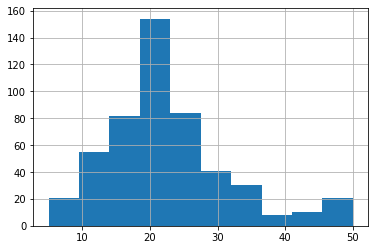

In [31]:
df['MEDV'].hist()   #Checking the distribution of the target variable

<AxesSubplot:>

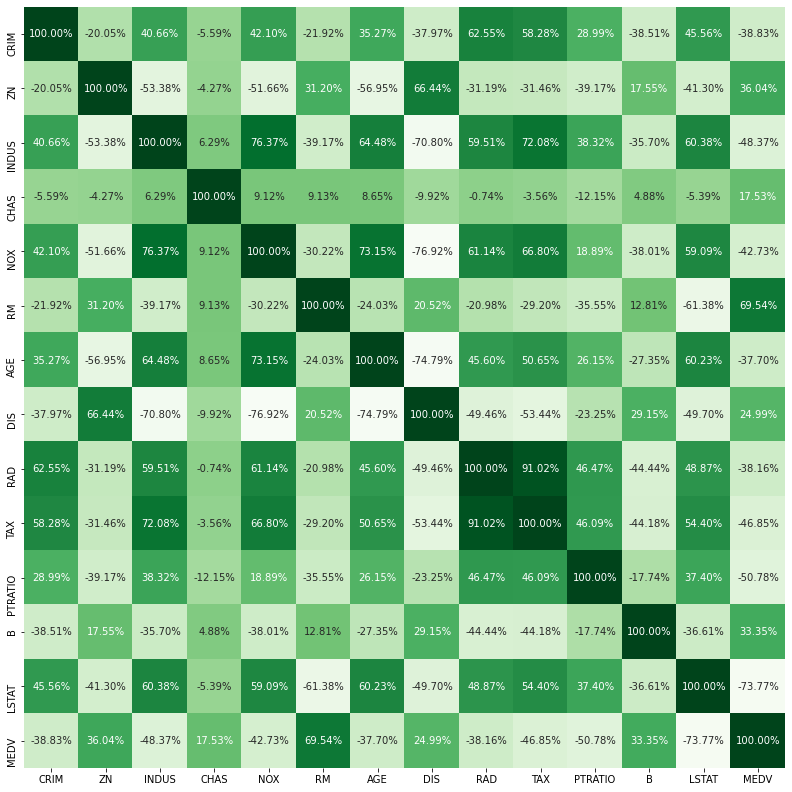

In [43]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation, cbar=False, square= True, fmt='0.2%', annot=True, cmap='Greens')  #Correlation Matrix and Heat Map

### We do the following
* Categorical variables: Bar plot
* Continuous variables: Histogram

<AxesSubplot:xlabel='RAD', ylabel='count'>

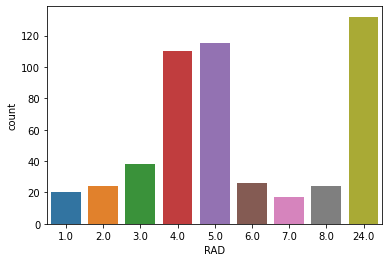

In [49]:
sns.countplot(x = 'RAD', data=df)     #since RAD is a categorical value. Let us see the available categories and frequency.

<AxesSubplot:xlabel='CHAS', ylabel='count'>

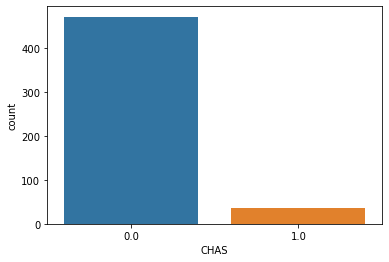

In [52]:
sns.countplot(x ='CHAS', data=df)   #since CHAS is a categorical value. Let us see the available categories and frequency.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, "CHAS" is skewed. There is just one bar which is dominating and other one have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that.

Whenever in doubt, always investigate the column further.

**Selected Categorical Variables**: Both the categorical variables are selected for further analysis.

'CHAS', 'RAD'

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

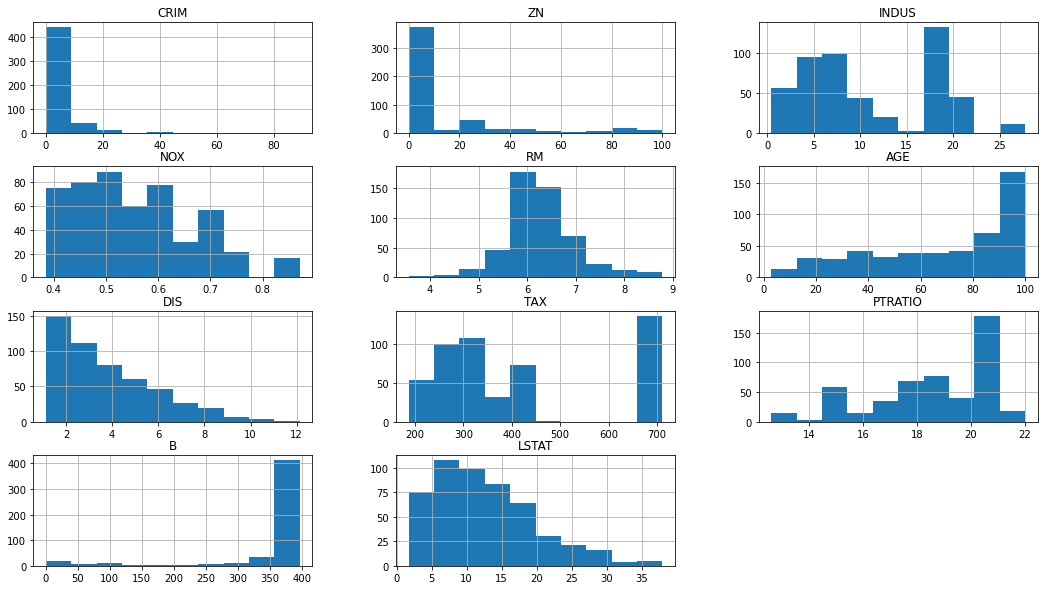

In [54]:
# Plotting the histograms all the continuous variables together
df.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT'], figsize=(18,10))

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

**Selected Continuous Variables**:

* CRIM : Selected. Outliers seen beyond 40, need to treat them.
* ZN : Selected. The distribution is good.
* INDUS : Selected. The distribution is good.
* NOX : Selected. The distribution is good.
* RM : Selected. The distribution is good.
* AGE : Selected. The distribution is good.
* DIS : Selected. The distribution is good.
* TAX : Selected. The distribution is good.
* PTRATIO : Selected. The distribution is good.
* B: Selected. The distribution is good.
* LSTAT: Selected. The distribution is good.

## Data Cleaning for Outliers

In [59]:
# Finding nearest values to 60 mark for CRIM
df['CRIM'][df['CRIM']<60].sort_values(ascending=False)

410    51.13580
414    45.74610
404    41.52920
398    38.35180
427    37.66190
         ...   
55      0.01311
341     0.01301
285     0.01096
284     0.00906
0       0.00632
Name: CRIM, Length: 503, dtype: float64

Hence, the nearest logical value is 51.13, hence, replacing any value above 60 with it.

In [61]:
# Replacing outliers with nearest possibe value
df['CRIM'][df['CRIM']>60] =51.13

array([[<AxesSubplot:title={'center':'CRIM'}>]], dtype=object)

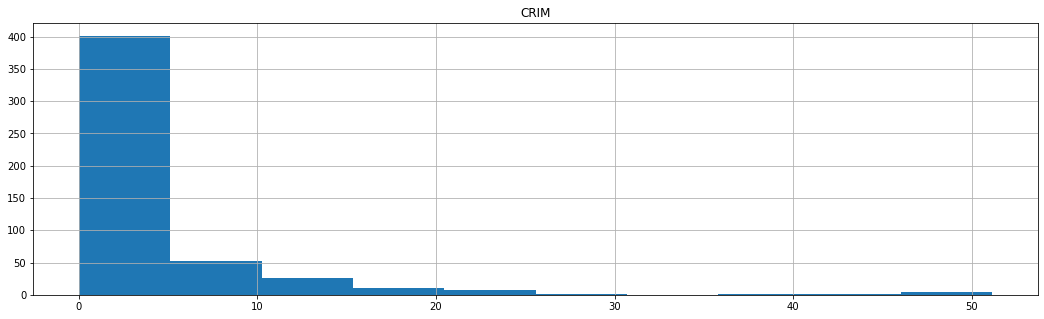

In [63]:
df.hist(['CRIM'], figsize=(18,5))   #after data cleaning

## Feature Selection Through Visual and Statistical Exploration 

Now we need to choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the **correlation values** or **ANOVA/Chi-Square tests**. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data. Now, for our case

### Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot

### Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test

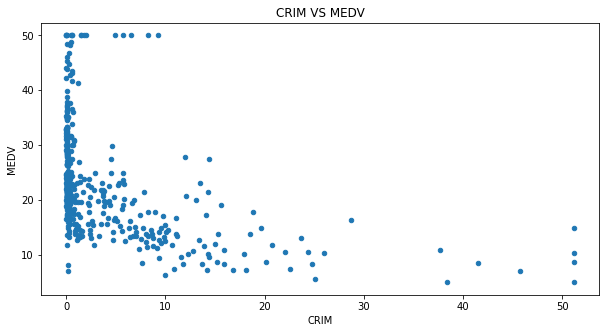

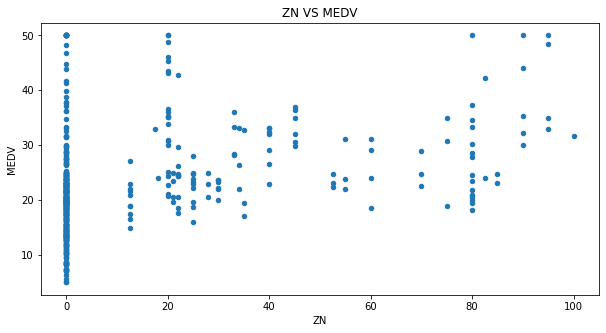

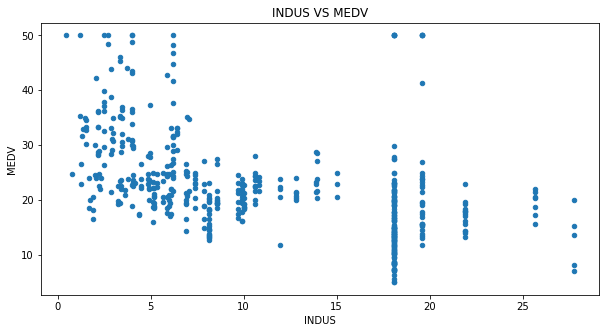

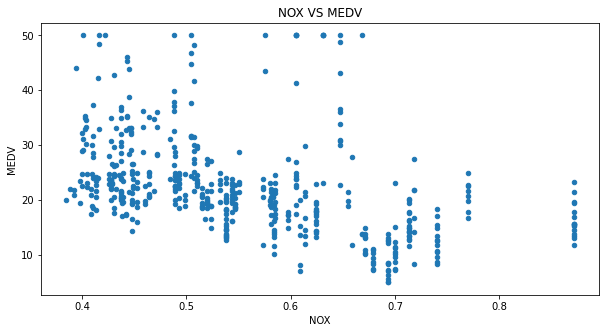

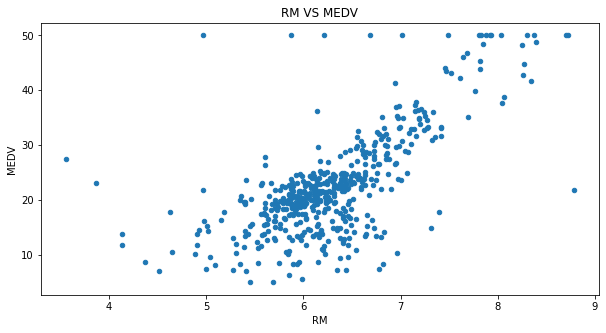

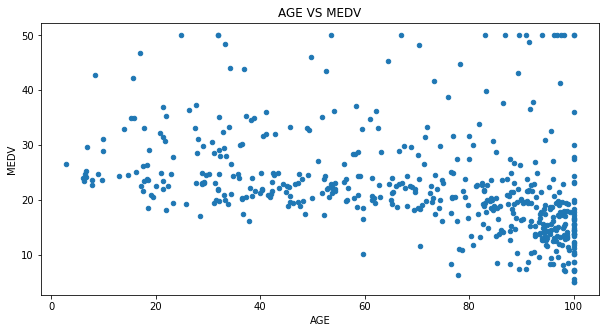

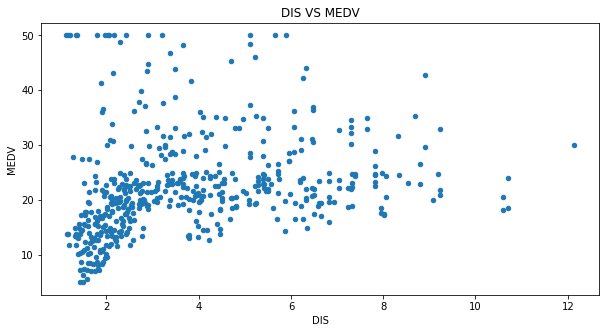

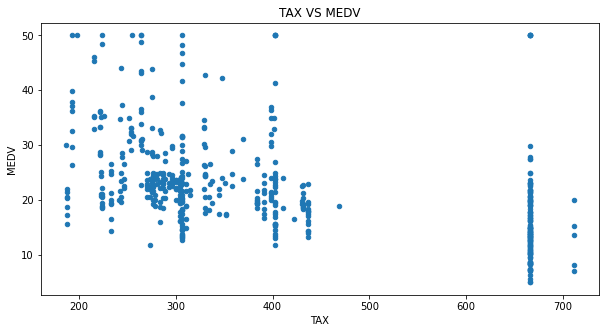

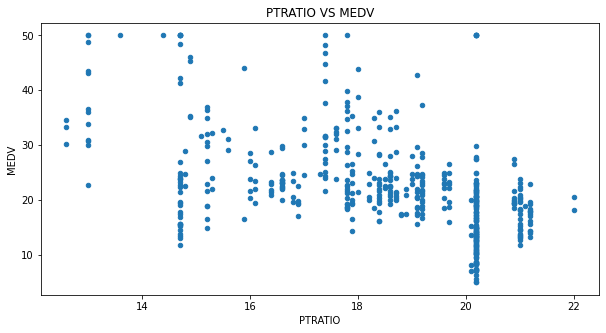

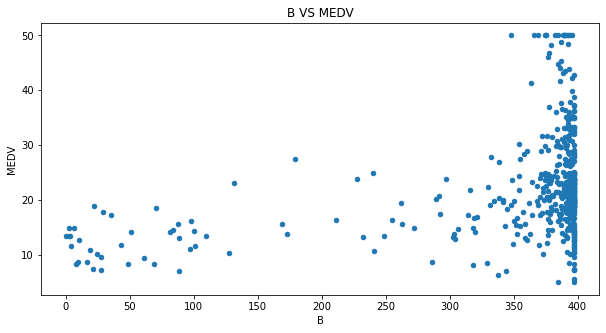

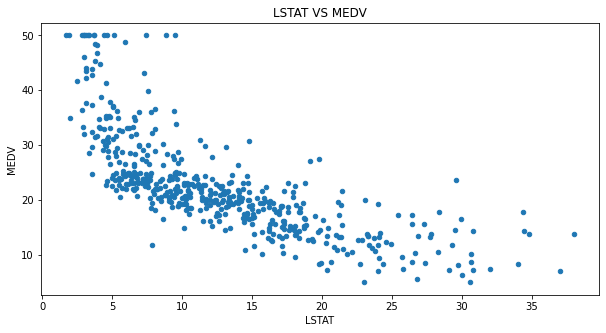

In [64]:
# For Continuous Targets vs Continuous Predictors - Scatter Plot
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='MEDV', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

If there is a trend in the scatterplot, then the variable is good for using in an ML Model. So, now lets look at the Statistical measurement for final conclusions.

In [65]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# will reduce the 0.5 threshold if no variable is selected
correlation['MEDV'][abs(correlation['MEDV']) > 0.5 ]

RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

#### Final selected Continuous columns:

'RM', 'PTRATIO','LSTAT'

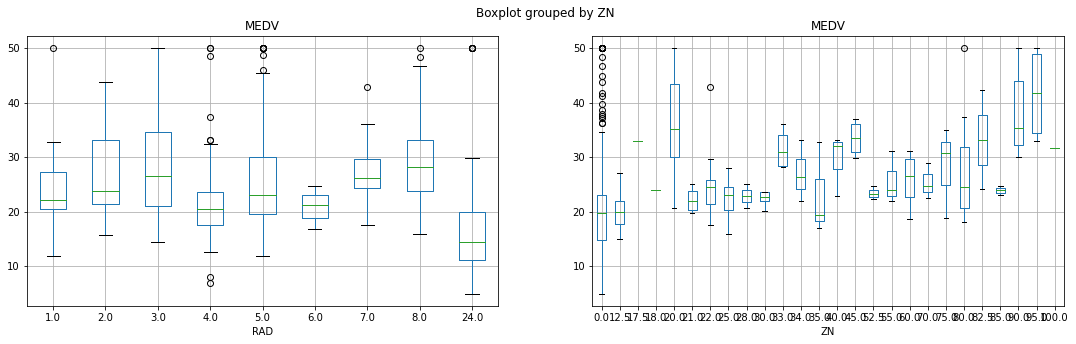

In [66]:
# For Continuous Targets vs Categorical Predictors - Box Plot
CategoricalColsList=['RAD', 'ZN']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

In this data, both the categorical predictors looks correlated with the Target variable. Lets, look at statistical test to confirm.

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [67]:
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [68]:
CategoricalPredictorList=['RAD', 'ZN']
FunctionAnova(inpData=df, 
              TargetVariable='MEDV', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

RAD is correlated with MEDV | P-Value: 3.1256493316010175e-24
ZN is correlated with MEDV | P-Value: 2.1871940303958843e-17


['RAD', 'ZN']

#### Final selected Categorical columns:
'RAD', 'ZN'

In [71]:
# Selecting final columns
DataForML = df[['RM', 'PTRATIO','LSTAT', 'RAD', 'ZN','MEDV']]
DataForML

,RM,PTRATIO,LSTAT,RAD,ZN,MEDV
0,6.575,15.3,4.98,1.0,18.0,24.0
1,6.421,17.8,9.14,2.0,0.0,21.6
2,7.185,17.8,4.03,2.0,0.0,34.7
3,6.998,18.7,2.94,3.0,0.0,33.4
4,7.147,18.7,5.33,3.0,0.0,36.2
...,...,...,...,...,...,...
501,6.593,21.0,9.67,1.0,0.0,22.4
502,6.120,21.0,9.08,1.0,0.0,20.6
503,6.976,21.0,5.64,1.0,0.0,23.9
504,6.794,21.0,6.48,1.0,0.0,22.0


In [70]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Preprocessing and Normalization for ML

In [76]:
# Separating Target Variable and Predictor Variables into Numpy arrays
TargetVariable = 'MEDV'
Predictors = ['RM', 'PTRATIO', 'LSTAT', 'RAD', 'ZN']

X = DataForML[Predictors].values
y = DataForML[TargetVariable].values

# On this data Min Max Normalization produces better results
Scaler = MinMaxScaler()

# Storing the fit object for later reference
ScalerFit = Scaler.fit(X)

# Generating the normalized values of X
X = ScalerFit.transform(X)

# Spliting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# Knowing the dimensions of the train and test sets
print("Train set data:", X_train.shape)
print("Train set targets:", y_train.shape)
print("Test set data:", X_test.shape)
print("Test set targets:", y_test.shape)

Train set data: (354, 5)
Train set targets: (354,)
Test set data: (152, 5)
Test set targets: (152,)


In [85]:
# Defining a custom function to calculate accuracy
# There should not be any zeros in the Target variable if using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

## Linear Regression Model

In [86]:
#Linear Regression
RegModel = LinearRegression()

# Creating the model on Training Data
LREG = RegModel.fit(X_train,y_train)
prediction = LREG.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
# Printing some sample values of prediction
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults = pd.DataFrame(data=X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE'] = 100*((abs(TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation on the given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.6863505215731058

##### Model Validation and Accuracy Calculations ##########
   MEDV  PredictedMEDV
0  23.6           27.0
1  32.4           31.0
2  13.6           16.0
3  22.8           25.0
4  16.1           18.0
Mean Accuracy on test data: 81.13189836501853
Median Accuracy on test data: 87.13506442904456

Accuracy values for 10-fold Cross Validation:
 [88.23444966 89.38394288 83.69138384 82.45700449 85.93525106 88.0694659
 84.21108522 48.01531498 49.70204889 85.21194959]

Final Average Accuracy of the model: 78.49


## Ridge Regression Model

In [98]:
#Ridge Regression
RidgeRegModel = Ridge(alpha=0.001)

# Creating the model on Training Data
RREG = RidgeRegModel.fit(X_train,y_train)
prediction = RREG.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RREG.predict(X_train)))

###########################################################################
# Printing some sample values of prediction
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE'] = 100*((abs(TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation on the given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RidgeRegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.6863505184034631

##### Model Validation and Accuracy Calculations ##########
   MEDV  PredictedMEDV
0  23.6           27.0
1  32.4           31.0
2  13.6           16.0
3  22.8           25.0
4  16.1           18.0
Mean Accuracy on test data: 81.13189836501853
Median Accuracy on test data: 87.13506442904456

Accuracy values for 10-fold Cross Validation:
 [88.2343449  89.38366702 83.69291484 82.45680297 85.93530343 88.068945
 84.21072866 48.02063621 49.70463662 85.21248504]

Final Average Accuracy of the model: 78.49


## Lasso Regression Model

In [97]:
#Lasso Regression
LassoRegModel = Lasso(alpha = 0.005)

# Creating the model on Training Data
LREG = LassoRegModel.fit(X_train,y_train)
prediction = LREG.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
# Printing some sample values of prediction
print('\n##### Model Validation and Accuracy Calculations ##########')

TestingDataResults = pd.DataFrame(data=X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted'+TargetVariable)] = np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE'] = 100*((abs(TestingDataResults['MEDV']-TestingDataResults['PredictedMEDV']))/TestingDataResults['MEDV'])

MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation on the given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(LassoRegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

R2 Value: 0.6863058133059539

##### Model Validation and Accuracy Calculations ##########
   MEDV  PredictedMEDV
0  23.6           27.0
1  32.4           31.0
2  13.6           16.0
3  22.8           25.0
4  16.1           18.0
Mean Accuracy on test data: 81.22178506941155
Median Accuracy on test data: 87.46347165400351

Accuracy values for 10-fold Cross Validation:
 [88.22089677 89.32219327 83.96335549 82.51864585 85.93622213 87.99951507
 84.15795103 48.20217313 49.93615078 85.24242471]

Final Average Accuracy of the model: 78.55


### Because of proper feature selection through statistical and visual analytical methods and normalization of data, 3 forms of linear regression give us comparable accuracy and test results even on cross-validation